In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train=pd.read_csv("fashion-mnist_train.csv")
test=pd.read_csv("fashion-mnist_test.csv")

In [3]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
train=np.matrix(train)
test=np.matrix(test)

In [5]:
train.shape

(60000, 785)

In [6]:
np.random.shuffle(train)
np.random.shuffle(test)

In [7]:
X_train=train[:int(train.shape[0]*80/100),2:].astype(np.float)
X_val=train[int(train.shape[0]*80/100):,2:].astype(np.float)
X_test=test[:,2:].astype(np.float)

y_train=train[:int(train.shape[0]*80/100),:1].astype(np.float)
y_val=train[int(train.shape[0]*80/100):,:1].astype(np.float)
y_test=test[:,:1].astype(np.float)

In [8]:
X_train.shape[0]+X_val.shape[0]

60000

In [9]:
y_val.shape[0]+y_train.shape[0]

60000

In [10]:
def tanh(X):
    return (np.exp(X)-np.exp(-X))/(np.exp(X)+np.exp(-X))

In [11]:
def norm(X,X_tr):
    X_tr_min=X_tr.min(0)
    X_tr_max=X_tr.max(0)
    X=(X-X_tr_min)/(X_tr_max-X_tr_min)
    return(X)

In [12]:
X_val=norm(X_val,X_train)
X_test=norm(X_test,X_train)
X_train=norm(X_train,X_train)

In [13]:
def get_one_hot(targets):
    targets=np.asarray(targets).reshape(-1)
    num_classes=len(np.unique(targets))
    indices=np.searchsorted(np.unique(targets),targets)
    res = np.eye(num_classes)[indices]
    return res.reshape(len(targets),num_classes)

In [14]:
def mat_ohe(data,cols_to_ohe):
    for i in cols_to_ohe:
        ohe_cols=get_one_hot(data[:,i])
        data=np.hstack((data,ohe_cols))
    data=np.delete(data,cols_to_ohe,1)
    return data.astype(float)

In [15]:
y_train=mat_ohe(y_train,[0])
y_val=mat_ohe(y_val,[0])
y_test=mat_ohe(y_test,[0])

In [16]:
y_train.shape

(48000, 10)

In [17]:
def softmax(X):
    p=np.exp(X)
    return(p/(p.sum(1).reshape(-1,1)))

In [18]:
def cost(y,p):
    return -1*np.sum(np.multiply(y,np.log(p)))/y.shape[0]

In [20]:
w1=np.random.randn(X_train.shape[1],nodes)
w2=np.random.randn(nodes,y_train.shape[1])
b1=np.random.randn(1,nodes)
b2=np.random.randn(1,y_train.shape[1])

In [21]:
epochs=5000
nodes=30
errbest=10000000
eta=0.00001
valerr=[]
trerr=[]
epoch=[]
p_tr=softmax(tanh(X_train@w1+b1)@w2+b2)

for i in range(epochs):
    Z=tanh(X_train@w1+b1)
    w1=w1-eta*X_train.T@(np.multiply((p_tr-y_train)@w2.T,1-np.power(Z,2)))
    b1=b1-eta*np.sum(np.multiply((p_tr-y_train)@w2.T,1-np.power(Z,2)))
    w2=w2-eta*Z.T@(p_tr-y_train)
    b2=b2-eta*np.sum(p_tr-y_train)
    
    p_val=softmax(tanh(X_val@w1+b1)@w2+b2)
    valerr.append(cost(y_val,p_val))
    p_tr=softmax(tanh(X_train@w1+b1)@w2+b2)
    trerr.append(cost(y_train,p_tr))
    epoch.append(i)
    
    if valerr[i-1]<errbest:
        errbest=valerr[i-1]
        w1_best=w1
        w2_best=w2
        b1_best=b1
        b2_best=b2

    

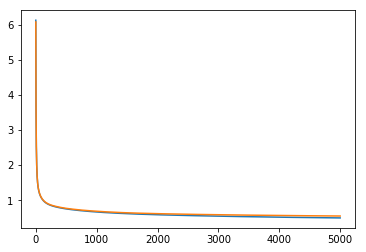

In [22]:
plt.plot(epoch,trerr)
plt.plot(epoch,valerr)

In [23]:
p_tr=softmax(tanh(X_train@w1_best+b1_best)@w2_best+b2_best)
cost(y_train,p_tr)

0.49562228801349323

In [24]:
p_val=softmax(tanh(X_val@w1_best+b1_best)@w2_best+b2_best)
cost(y_val,p_val)

0.5496659473585317

In [26]:
y_pred=np.eye(p_val.shape[1])[np.argmax(p_val, axis=1)]

In [27]:
y_pred=y_pred[:,0,:]

In [28]:
acc=((y_pred == y_val).mean()*100)

In [29]:
acc

96.25166666666667

In [30]:
recalls=np.where(((y_pred==y_val) & (y_pred==1)), y_pred,0).sum(0)/y_val.sum(0)*100

In [31]:
recalls

matrix([[84.35609334, 94.3457189 , 70.794193  , 80.87520259, 74.48218724,
         88.47807395, 47.12171053, 86.94929343, 91.51973132, 93.68852459]])

In [32]:
#Sort y based on probabilities for eah row
y_sort=np.array(y_val[np.argsort(p_val, axis=0),np.arange(np.argsort(p_val, axis=0).shape[1])])

pos = y_sort.sum(0)
neg = (1-y_sort).sum(0)

tn = np.cumsum(1-y_sort,axis=0)
fpr = 1-tn/neg

tp = pos - np.cumsum(y_sort, axis=0)
tpr = tp/pos

tpr=np.insert(tpr,0,1,axis=0)
fpr=np.insert(fpr,0,1,axis=0)

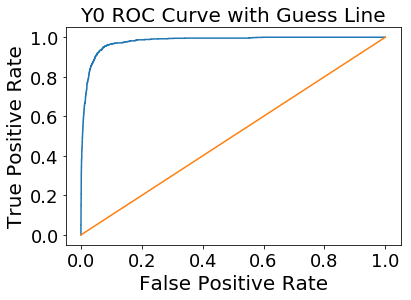

In [33]:
plt.plot(fpr[:,0],tpr[:,0])
plt.xticks(fontsize=18)
plt.xlabel("False Positive Rate",fontsize=20)
plt.yticks(fontsize=18)
plt.ylabel("True Positive Rate" ,fontsize=20)
plt.title("Y0 ROC Curve with Guess Line", fontsize=20)
plt.plot([0,1],[0,1])

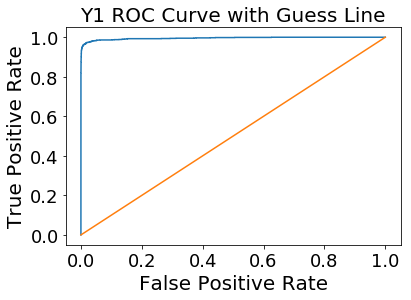

In [34]:
plt.plot(fpr[:,1],tpr[:,1])
plt.xticks(fontsize=18)
plt.xlabel("False Positive Rate",fontsize=20)
plt.yticks(fontsize=18)
plt.ylabel("True Positive Rate" ,fontsize=20)
plt.title("Y1 ROC Curve with Guess Line", fontsize=20)
plt.plot([0,1],[0,1])

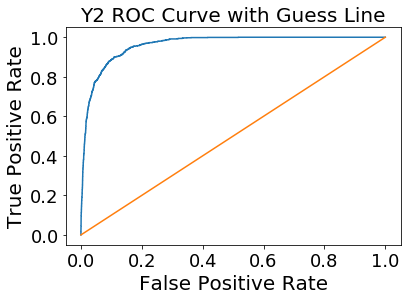

In [35]:
plt.plot(fpr[:,2],tpr[:,2])
plt.xticks(fontsize=18)
plt.xlabel("False Positive Rate",fontsize=20)
plt.yticks(fontsize=18)
plt.ylabel("True Positive Rate" ,fontsize=20)
plt.title("Y2 ROC Curve with Guess Line", fontsize=20)
plt.plot([0,1],[0,1])

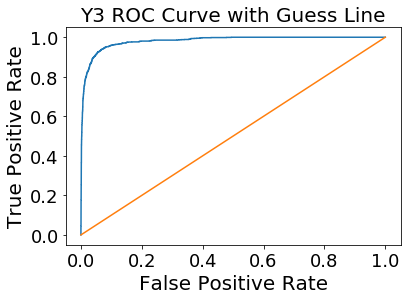

In [36]:
plt.plot(fpr[:,3],tpr[:,3])
plt.xticks(fontsize=18)
plt.xlabel("False Positive Rate",fontsize=20)
plt.yticks(fontsize=18)
plt.ylabel("True Positive Rate" ,fontsize=20)
plt.title("Y3 ROC Curve with Guess Line", fontsize=20)
plt.plot([0,1],[0,1])

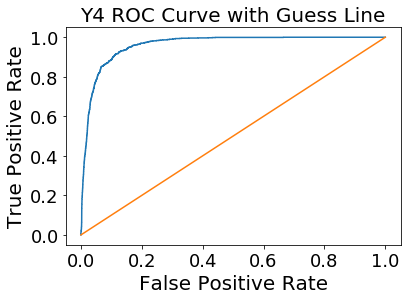

In [37]:
plt.plot(fpr[:,4],tpr[:,4])
plt.xticks(fontsize=18)
plt.xlabel("False Positive Rate",fontsize=20)
plt.yticks(fontsize=18)
plt.ylabel("True Positive Rate" ,fontsize=20)
plt.title("Y4 ROC Curve with Guess Line", fontsize=20)
plt.plot([0,1],[0,1])

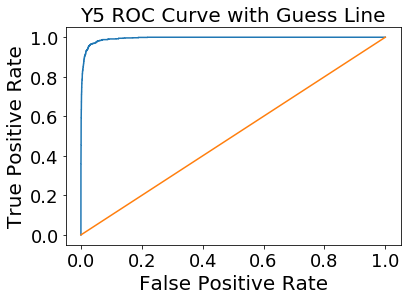

In [38]:
plt.plot(fpr[:,5],tpr[:,5])
plt.xticks(fontsize=18)
plt.xlabel("False Positive Rate",fontsize=20)
plt.yticks(fontsize=18)
plt.ylabel("True Positive Rate" ,fontsize=20)
plt.title("Y5 ROC Curve with Guess Line", fontsize=20)
plt.plot([0,1],[0,1])

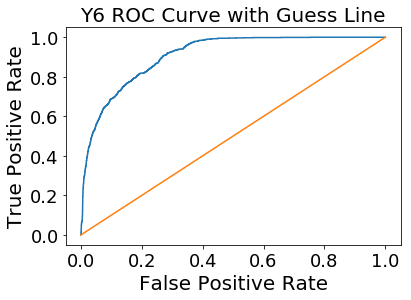

In [39]:
plt.plot(fpr[:,6],tpr[:,6])
plt.xticks(fontsize=18)
plt.xlabel("False Positive Rate",fontsize=20)
plt.yticks(fontsize=18)
plt.ylabel("True Positive Rate" ,fontsize=20)
plt.title("Y6 ROC Curve with Guess Line", fontsize=20)
plt.plot([0,1],[0,1])

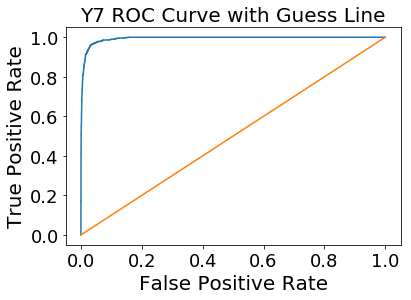

In [40]:
plt.plot(fpr[:,7],tpr[:,7])
plt.xticks(fontsize=18)
plt.xlabel("False Positive Rate",fontsize=20)
plt.yticks(fontsize=18)
plt.ylabel("True Positive Rate" ,fontsize=20)
plt.title("Y7 ROC Curve with Guess Line", fontsize=20)
plt.plot([0,1],[0,1])

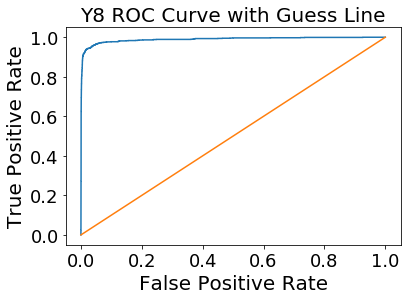

In [41]:
plt.plot(fpr[:,8],tpr[:,8])
plt.xticks(fontsize=18)
plt.xlabel("False Positive Rate",fontsize=20)
plt.yticks(fontsize=18)
plt.ylabel("True Positive Rate" ,fontsize=20)
plt.title("Y8 ROC Curve with Guess Line", fontsize=20)
plt.plot([0,1],[0,1])

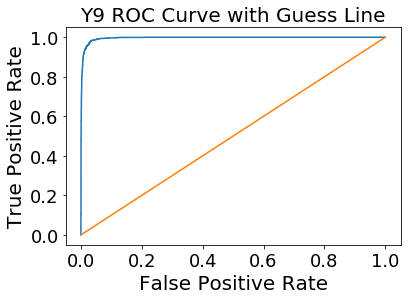

In [42]:
plt.plot(fpr[:,9],tpr[:,9])
plt.xticks(fontsize=18)
plt.xlabel("False Positive Rate",fontsize=20)
plt.yticks(fontsize=18)
plt.ylabel("True Positive Rate" ,fontsize=20)
plt.title("Y9 ROC Curve with Guess Line", fontsize=20)
plt.plot([0,1],[0,1])

In [43]:
auc=-.5*(np.sum(tpr[1:,:]*np.diff(fpr,axis=0), axis=0)+np.sum(tpr[:-1,:]*np.diff(fpr,axis=0), axis=0))

In [44]:
auc

array([0.97990267, 0.99534141, 0.96118647, 0.98112763, 0.96050111,
       0.9945499 , 0.90877926, 0.99366908, 0.98921507, 0.99623506])

In [45]:
p_test=softmax(tanh(X_test@w1_best+b1_best)@w2_best+b2_best)
cost(y_test,p_test)

0.5422721964605457

In [46]:
y_pred=np.eye(p_test.shape[1])[np.argmax(p_test, axis=1)]
y_pred=y_pred[:,0,:]
acc=((y_pred == y_test).mean()*100)
acc

96.22800000000001

In [47]:
recalls=np.where(((y_pred==y_test) & (y_pred==1)), y_pred,0).sum(0)/y_test.sum(0)*100
recalls

matrix([[78.6, 94.6, 72.8, 82. , 78. , 87.5, 46.3, 87.6, 92.1, 91.9]])

In [48]:
#Sort y based on probabilities for eah row
y_sort=np.array(y_test[np.argsort(p_test, axis=0),np.arange(np.argsort(p_test, axis=0).shape[1])])

pos = y_sort.sum(0)
neg = (1-y_sort).sum(0)

tn = np.cumsum(1-y_sort,axis=0)
fpr = 1-tn/neg

tp = pos - np.cumsum(y_sort, axis=0)
tpr = tp/pos

tpr=np.insert(tpr,0,1,axis=0)
fpr=np.insert(fpr,0,1,axis=0)

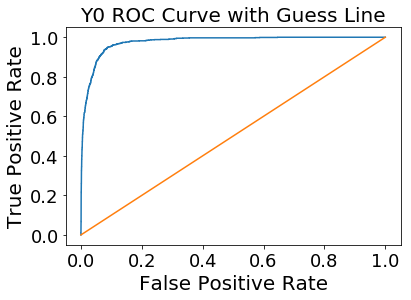

In [49]:
plt.plot(fpr[:,0],tpr[:,0])
plt.xticks(fontsize=18)
plt.xlabel("False Positive Rate",fontsize=20)
plt.yticks(fontsize=18)
plt.ylabel("True Positive Rate" ,fontsize=20)
plt.title("Y0 ROC Curve with Guess Line", fontsize=20)
plt.plot([0,1],[0,1])

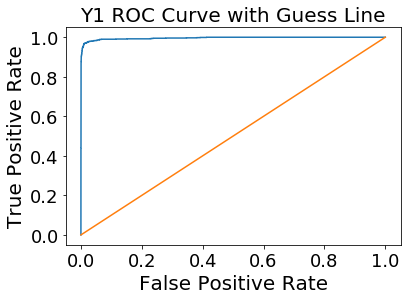

In [50]:
plt.plot(fpr[:,1],tpr[:,1])
plt.xticks(fontsize=18)
plt.xlabel("False Positive Rate",fontsize=20)
plt.yticks(fontsize=18)
plt.ylabel("True Positive Rate" ,fontsize=20)
plt.title("Y1 ROC Curve with Guess Line", fontsize=20)
plt.plot([0,1],[0,1])

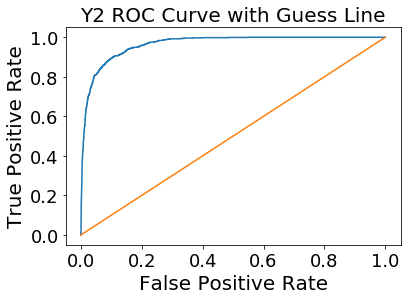

In [51]:
plt.plot(fpr[:,2],tpr[:,2])
plt.xticks(fontsize=18)
plt.xlabel("False Positive Rate",fontsize=20)
plt.yticks(fontsize=18)
plt.ylabel("True Positive Rate" ,fontsize=20)
plt.title("Y2 ROC Curve with Guess Line", fontsize=20)
plt.plot([0,1],[0,1])

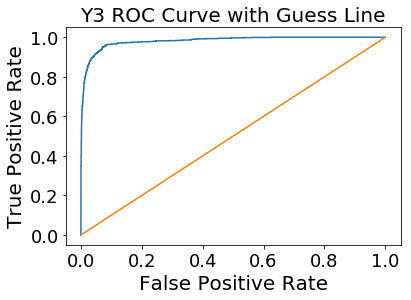

In [52]:
plt.plot(fpr[:,3],tpr[:,3])
plt.xticks(fontsize=18)
plt.xlabel("False Positive Rate",fontsize=20)
plt.yticks(fontsize=18)
plt.ylabel("True Positive Rate" ,fontsize=20)
plt.title("Y3 ROC Curve with Guess Line", fontsize=20)
plt.plot([0,1],[0,1])

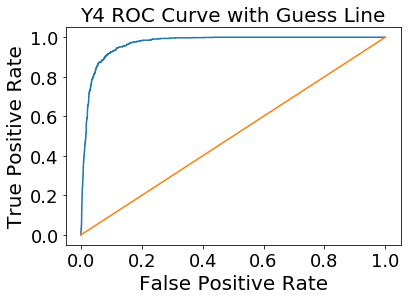

In [53]:
plt.plot(fpr[:,4],tpr[:,4])
plt.xticks(fontsize=18)
plt.xlabel("False Positive Rate",fontsize=20)
plt.yticks(fontsize=18)
plt.ylabel("True Positive Rate" ,fontsize=20)
plt.title("Y4 ROC Curve with Guess Line", fontsize=20)
plt.plot([0,1],[0,1])

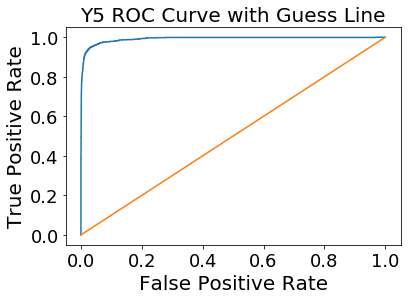

In [54]:
plt.plot(fpr[:,5],tpr[:,5])
plt.xticks(fontsize=18)
plt.xlabel("False Positive Rate",fontsize=20)
plt.yticks(fontsize=18)
plt.ylabel("True Positive Rate" ,fontsize=20)
plt.title("Y5 ROC Curve with Guess Line", fontsize=20)
plt.plot([0,1],[0,1])

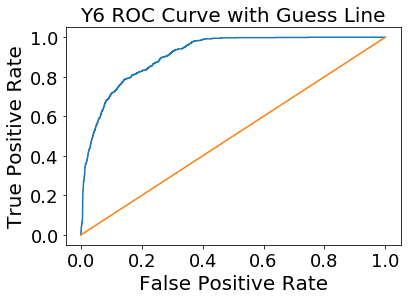

In [55]:
plt.plot(fpr[:,6],tpr[:,6])
plt.xticks(fontsize=18)
plt.xlabel("False Positive Rate",fontsize=20)
plt.yticks(fontsize=18)
plt.ylabel("True Positive Rate" ,fontsize=20)
plt.title("Y6 ROC Curve with Guess Line", fontsize=20)
plt.plot([0,1],[0,1])

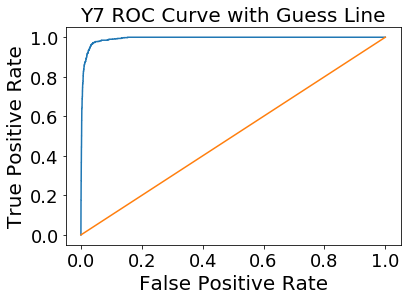

In [56]:
plt.plot(fpr[:,7],tpr[:,7])
plt.xticks(fontsize=18)
plt.xlabel("False Positive Rate",fontsize=20)
plt.yticks(fontsize=18)
plt.ylabel("True Positive Rate" ,fontsize=20)
plt.title("Y7 ROC Curve with Guess Line", fontsize=20)
plt.plot([0,1],[0,1])

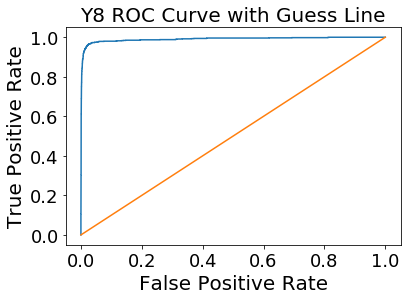

In [57]:
plt.plot(fpr[:,8],tpr[:,8])
plt.xticks(fontsize=18)
plt.xlabel("False Positive Rate",fontsize=20)
plt.yticks(fontsize=18)
plt.ylabel("True Positive Rate" ,fontsize=20)
plt.title("Y8 ROC Curve with Guess Line", fontsize=20)
plt.plot([0,1],[0,1])

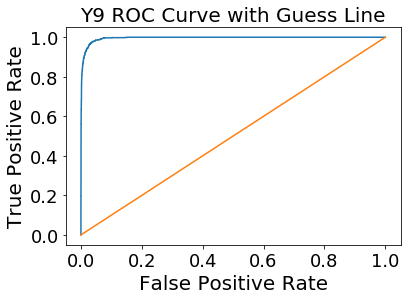

In [58]:
plt.plot(fpr[:,9],tpr[:,9])
plt.xticks(fontsize=18)
plt.xlabel("False Positive Rate",fontsize=20)
plt.yticks(fontsize=18)
plt.ylabel("True Positive Rate" ,fontsize=20)
plt.title("Y9 ROC Curve with Guess Line", fontsize=20)
plt.plot([0,1],[0,1])

In [59]:
auc=-.5*(np.sum(tpr[1:,:]*np.diff(fpr,axis=0), axis=0)+np.sum(tpr[:-1,:]*np.diff(fpr,axis=0), axis=0))

In [60]:
auc

array([0.97581589, 0.99596156, 0.96492033, 0.98128422, 0.96904167,
       0.99190922, 0.91179478, 0.99287   , 0.990412  , 0.99581422])